In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analysis for the Chevrolet Agile 2011 OBD 

### Read data

In [2]:
df= pd.read_csv("exp1_14drivers_14cars_dailyRoutes.csv")

# Set time index 
for i in range(df['TIMESTAMP'].__len__()):
    df['TIMESTAMP'][i]= df['TIMESTAMP'][i]/1000
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], unit='s')
df=df.set_index('TIMESTAMP')


C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_8376\1937814435.py:1: DtypeWarning: Columns (1,2,4,5,6,9,10,14,15,16,20,21,22,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("exp1_14drivers_14cars_dailyRoutes.csv")
C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_8376\1937814435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIMESTAMP'][i]= df['TIMESTAMP'][i]/1000


In [3]:
# Filter data to only chevrolet agile cars only
agile_df= df[df['VEHICLE_ID']=='car1']

agile_df

,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,...,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2017-08-16 16:55:04.267000064,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","33,30%",...,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0
2017-08-16 16:55:12.283000064,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,50%",...,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
2017-08-16 16:55:20.290999808,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,90%",...,25%,MIL is OFF0 codes,NaN,"57,3%","1,0%",13.0,16.0,2.0,8.0,2017.0
2017-08-16 16:55:28.300000000,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,50%",...,25%,MIL is OFF0 codes,NaN,"56,5%","1,0%",13.0,16.0,2.0,8.0,2017.0
2017-08-16 16:55:36.320000000,chevrolet,agile,2011.0,"1,4",n,car1,100.0,80.0,"48,60%","32,90%",...,25%,MIL is OFF0 codes,NaN,"56,9%","1,0%",13.0,16.0,2.0,8.0,2017.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-12 18:05:58.136000000,chevrolet,agile,2011.0,"1,4",n,car1,NaN,NaN,NaN,NaN,...,NaN,MIL is OFF0 codes,NaN,NaN,NaN,13.0,18.0,1.0,9.0,2017.0
2017-09-12 18:06:02.151000064,chevrolet,agile,2011.0,"1,4",n,car1,NaN,NaN,NaN,NaN,...,NaN,MIL is OFF0 codes,NaN,NaN,NaN,13.0,18.0,1.0,9.0,2017.0
2017-09-12 18:06:06.176999936,chevrolet,agile,2011.0,"1,4",n,car1,NaN,NaN,NaN,NaN,...,NaN,MIL is OFF0 codes,NaN,NaN,NaN,13.0,18.0,1.0,9.0,2017.0


In [39]:
df = df.dropna(subset = ['TROUBLE_CODES']).reset_index(drop=True) # getting rid of null values from trouble codes

In [60]:
new_car=df[df['VEHICLE_ID']== 'car6']
new_car['MARK']

0       volkswagen
1       volkswagen
2       volkswagen
3       volkswagen
4       volkswagen
           ...    
6065    volkswagen
6066    volkswagen
6067    volkswagen
6068    volkswagen
6069    volkswagen
Name: MARK, Length: 6070, dtype: object

## Data cleaning

In [4]:
# Columns number
agile_df.columns.size

32

In [5]:
agile_df['BAROMETRIC_PRESSURE(KPA)'].unique()

array([100., 101.,  nan,  99.])

In [6]:
for cl in agile_df.columns:
    print(cl)

MARK
MODEL
CAR_YEAR
ENGINE_POWER
AUTOMATIC
VEHICLE_ID
BAROMETRIC_PRESSURE(KPA)
ENGINE_COOLANT_TEMP
FUEL_LEVEL
ENGINE_LOAD
AMBIENT_AIR_TEMP
ENGINE_RPM
INTAKE_MANIFOLD_PRESSURE
MAF
LONG TERM FUEL TRIM BANK 2
FUEL_TYPE
AIR_INTAKE_TEMP
FUEL_PRESSURE
SPEED
SHORT TERM FUEL TRIM BANK 2
SHORT TERM FUEL TRIM BANK 1
ENGINE_RUNTIME
THROTTLE_POS
DTC_NUMBER
TROUBLE_CODES
TIMING_ADVANCE
EQUIV_RATIO
MIN
HOURS
DAYS_OF_WEEK
MONTHS
YEAR


In [43]:
# Select important columns

cleaned_df = agile_df[['BAROMETRIC_PRESSURE(KPA)','ENGINE_COOLANT_TEMP','FUEL_LEVEL','ENGINE_LOAD','AMBIENT_AIR_TEMP','ENGINE_RPM','INTAKE_MANIFOLD_PRESSURE','MAF','AIR_INTAKE_TEMP','SPEED','ENGINE_RUNTIME','THROTTLE_POS','DTC_NUMBER','TIMING_ADVANCE','TROUBLE_CODES']]

cleaned_df

,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,AMBIENT_AIR_TEMP,ENGINE_RPM,INTAKE_MANIFOLD_PRESSURE,MAF,AIR_INTAKE_TEMP,SPEED,ENGINE_RUNTIME,THROTTLE_POS,DTC_NUMBER,TIMING_ADVANCE,TROUBLE_CODES
TIMESTAMP,,,,,,,,,,,,,,,
2017-08-16 16:55:04.267000064,100.0,80.0,"48,60%","33,30%",NaN,1009.0,49.0,"4,49",59.0,0.0,00:03:28,25%,MIL is OFF0 codes,"56,9%",NaN
2017-08-16 16:55:12.283000064,100.0,80.0,"48,60%","32,50%",NaN,1003.0,52.0,"4,51",59.0,0.0,00:03:35,25%,MIL is OFF0 codes,"56,5%",NaN
2017-08-16 16:55:20.290999808,100.0,80.0,"48,60%","32,90%",NaN,995.0,51.0,"4,48",59.0,0.0,00:03:43,25%,MIL is OFF0 codes,"57,3%",NaN
2017-08-16 16:55:28.300000000,100.0,80.0,"48,60%","32,50%",NaN,1004.0,51.0,"4,51",60.0,0.0,00:03:51,25%,MIL is OFF0 codes,"56,5%",NaN
2017-08-16 16:55:36.320000000,100.0,80.0,"48,60%","32,90%",NaN,1005.0,49.0,"4,49",60.0,0.0,00:03:59,25%,MIL is OFF0 codes,"56,9%",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-12 18:05:58.136000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,MIL is OFF0 codes,NaN,NaN
2017-09-12 18:06:02.151000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,MIL is OFF0 codes,NaN,NaN
2017-09-12 18:06:06.176999936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,MIL is OFF0 codes,NaN,NaN


In [ ]:
# Remove Nan values 

cleaned_df.fillna(method='ffill',inplace=True)
cleaned_df.fillna(method='bfill',inplace=True)

# Remove the percentage symbol and convert to numeric values
cleaned_df['THROTTLE_POS'] = cleaned_df['THROTTLE_POS'].str.rstrip('%').astype(float)
cleaned_df['ENGINE_LOAD'] = cleaned_df['ENGINE_LOAD'].str.rstrip('%').str.replace(',', '.').astype(float)
cleaned_df['FUEL_LEVEL'] = cleaned_df['FUEL_LEVEL'].str.rstrip('%').str.replace(',', '.').astype(float)


## Data Analysis

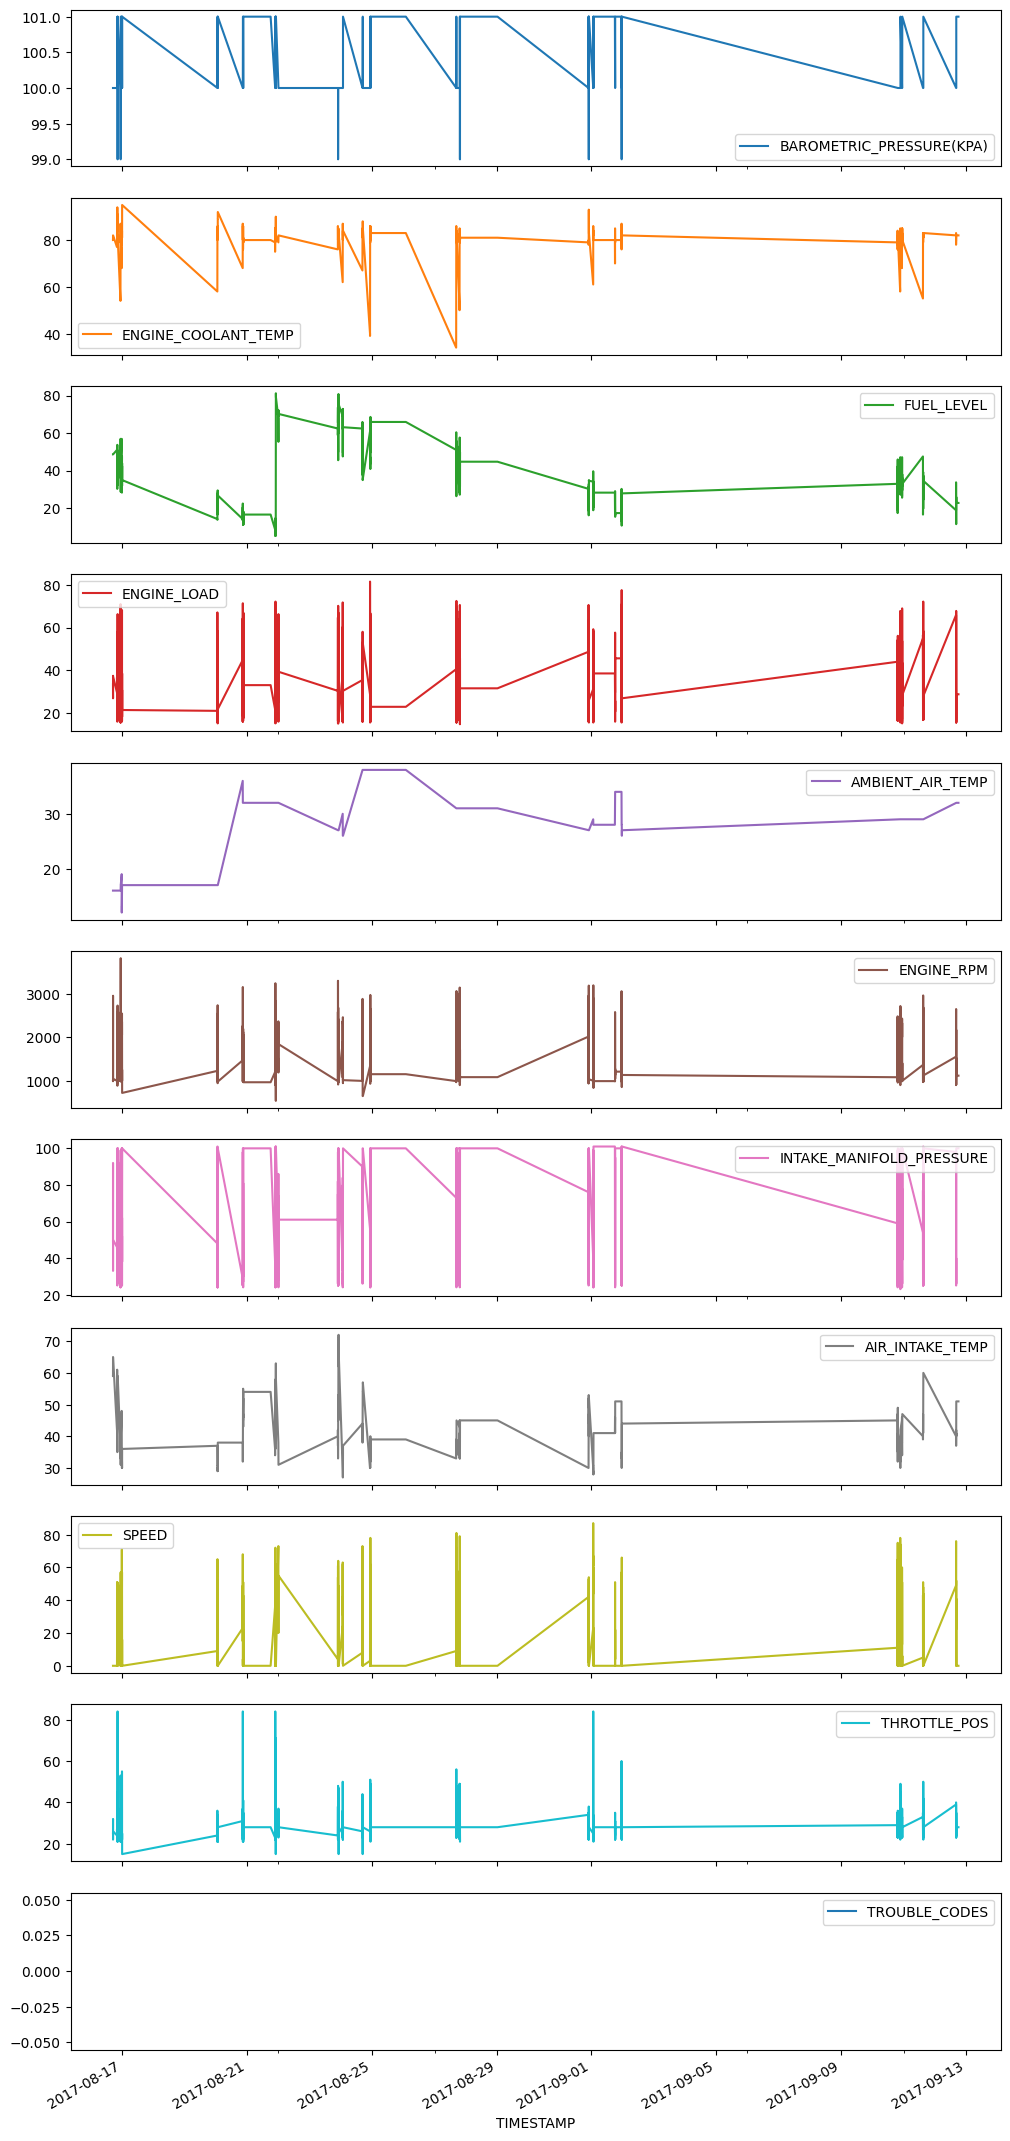

In [45]:
# Make a plot

cleaned_df.plot(subplots=True,figsize=(12,30))
plt.show()

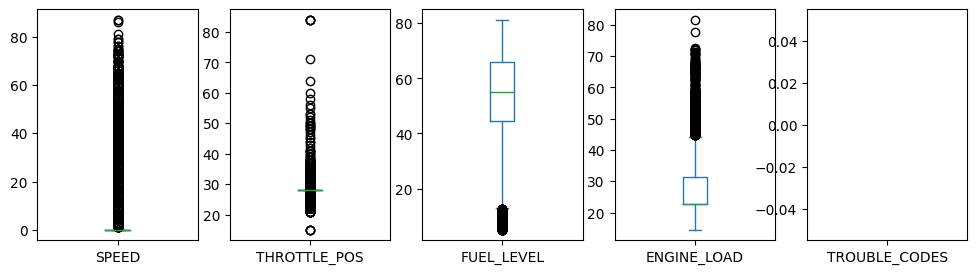

In [50]:
select = ['ENGINE_RPM','SPEED','THROTTLE_POS','FUEL_LEVEL','ENGINE_LOAD','ENGINE_RPM','TROUBLE_CODES']

cleaned_df[select].plot(kind='box',subplots=True,figsize=(12,3))
plt.show()

In [ ]:
# sns.pairplot(cleaned_df[select])
# plt.show()

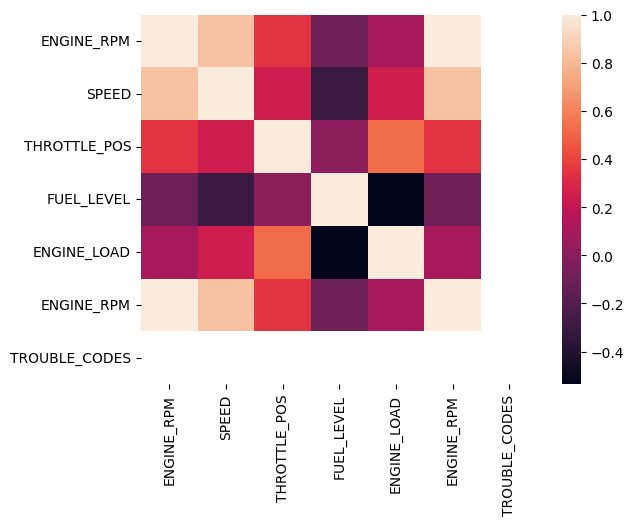

In [51]:
# Heatmap is very effecient in finding collerations between features

sns.heatmap(cleaned_df[select].corr())
plt.show()

## Heatmap analysis 

* It's clear from the heatmap that some features are highly collerated with each other ex => **Speed** - **Engine rpm**
* And some are somewhat collerated ex => **Engine load** - **Throttle position**
* And some are very distinct ex => **Fuel level** - **Engine Load**

                                                                                           

#### This is a full analysis profile made with pandas which is very helpful in gaining insights from a dataset

In [14]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(cleaned_df, explorative=True, minimal =False)
# try:
#     profile.to_widgets()
# except:
#     profile.to_notebook_iframe()

# profile.to_file('chev.html')    

## DTC codes analysis 
The *cheverolet agile* didn't have any DTC codes so we made analysis on another car with a punch of DTC codes which is the **volkswagen polo**

In [61]:
# Select polo rows only 
polo_df = df[df['VEHICLE_ID']=='car6']
polo_df.head()

,MARK,MODEL,CAR_YEAR,ENGINE_POWER,AUTOMATIC,VEHICLE_ID,BAROMETRIC_PRESSURE(KPA),ENGINE_COOLANT_TEMP,FUEL_LEVEL,ENGINE_LOAD,...,THROTTLE_POS,DTC_NUMBER,TROUBLE_CODES,TIMING_ADVANCE,EQUIV_RATIO,MIN,HOURS,DAYS_OF_WEEK,MONTHS,YEAR
0,volkswagen,polo,2006.0,"1,6",n,car6,NaN,42.0,NaN,"6,30%",...,4%,MIL is OFF1 codes,P0133,"71,4%",NaN,53.0,18.0,5.0,7.0,2017.0
1,volkswagen,polo,2006.0,"1,6",n,car6,NaN,42.0,NaN,"6,70%",...,4%,MIL is OFF1 codes,P0133,"69,0%",NaN,53.0,18.0,5.0,7.0,2017.0
2,volkswagen,polo,2006.0,"1,6",n,car6,NaN,43.0,NaN,"7,50%",...,4%,MIL is OFF1 codes,P0133,"50,6%",NaN,53.0,18.0,5.0,7.0,2017.0
3,volkswagen,polo,2006.0,"1,6",n,car6,NaN,44.0,NaN,"5,50%",...,4%,MIL is OFF1 codes,P0133,"53,7%",NaN,53.0,18.0,5.0,7.0,2017.0
4,volkswagen,polo,2006.0,"1,6",n,car6,NaN,45.0,NaN,"5,10%",...,3%,MIL is OFF1 codes,P0133,"54,1%",NaN,53.0,18.0,5.0,7.0,2017.0


In [63]:
# Extract the codes

DTC_codes=polo_df['TROUBLE_CODES'].unique()
DTC_codes

array(['P0133'], dtype=object)

It seems that Polo has only one DTC code let's break it down *(P0133)* :

- *"P0"*  indicates that it is a generic powertrain code.
- *"1"*  refers to the specific area of the vehicle where the issue is detected. In this case, it is related to the fuel and air metering, which typically involves the oxygen sensor.
- *"33"* specifies the specific fault or error within that area. In this case, it indicates a problem with the oxygen sensor circuit or a slow response from the sensor.

### In conclusion : 
The P0133 code specifically indicates that there is a malfunction or low voltage condition detected in the downstream oxygen sensor (Bank 1, Sensor 1) of the vehicle. The downstream sensor is located after the catalytic converter and is responsible for monitoring the oxygen content in the exhaust gases.


## Engine Performance Evaluation
In this section we will use Linear regression to Evaluate The performance of the engine

In [75]:
# preprocess MAF datatype
cleaned_df['MAF'] = cleaned_df['MAF'].str.replace(',', '.').astype(float)

C:\Users\Ahmed Medhat\AppData\Local\Temp\ipykernel_8376\2441257429.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['MAF'] = cleaned_df['MAF'].str.replace(',', '.').astype(float)


In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
# Select the columns for the independent variables
X = cleaned_df[['ENGINE_COOLANT_TEMP', 'ENGINE_RPM',
       'AIR_INTAKE_TEMP', 'ENGINE_LOAD', 'THROTTLE_POS']]

# Select the column for the dependent variable
y = cleaned_df['MAF']

# Split the data into a training set and a test set 
# I did a 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2, "\n")
# Create a DataFrame to store the actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Print the first 20 rows of the results DataFrame
print(results.head(20))

Mean Squared Error: 0.5950110681837866
R^2 Score: 0.9071087650272748 

                               Actual  Predicted
TIMESTAMP                                       
2017-08-25 19:35:55.969000192    3.79   3.749989
2017-08-16 20:16:58.168000000    9.10   9.144937
2017-08-21 17:17:24.588000000    5.54   4.451316
2017-08-25 16:22:58.894000128    3.79   3.749989
2017-08-16 23:54:23.102999808    3.27   2.177629
2017-08-24 22:37:18.336999936   11.06   9.036011
2017-09-10 19:27:09.632999936   13.84  12.663872
2017-08-26 00:16:32.553999872    3.79   3.749989
2017-08-21 17:04:29.236000000    5.54   4.451316
2017-09-10 21:24:46.072000000   11.57  11.274182
2017-08-28 20:52:59.332999936    4.44   4.815778
2017-08-25 17:19:16.025000192    3.79   3.749989
2017-08-25 06:47:19.091000064    3.79   3.749989
2017-08-24 01:31:17.708000000    4.61   4.101326
2017-08-28 21:18:03.688000000    4.44   4.815778
2017-08-25 02:31:33.390000128    3.79   3.749989
2017-08-25 01:40:23.224000000    3.79   3.74998